In [2]:
# assumption:
# the person should look toward the camera

In [4]:
# PROCEDURE: 
# take the template
# turn it to gray scale because we need only light and dark features
# at first we use eyes classifier. If we find eyes then it is face otherwise not.
# if eye is found then look for nose by nose classifier.... this will go till we pass the majority of them

In [21]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [22]:
def load():
    global nadia, dennis, solvay
    nadia = cv2.imread('data/Nadia_Murad.jpg', 0)
    dennis = cv2.imread('data/Denis_Mukwege.jpg', 0)
    solvay = cv2.imread('data/solvay_conference.jpg', 0)
#     orig = cv2.cvtColor(orig, cv2.COLOR_BGR2RGB)
#     global img
#     img = orig.copy()
    # not intrested in changing the color as we want to detect only the edges

In [23]:
def imshow(image):
    plt.figure(figsize=(7,7))
    plt.imshow(image, cmap='gray')

In [24]:
load()

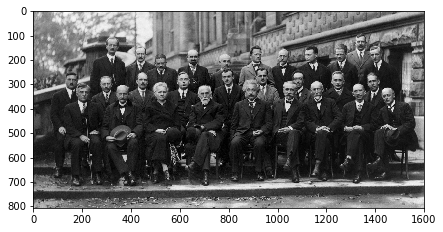

In [25]:
imshow(solvay)
# imshow(nadia)
# imshow(dennis)

In [26]:
face_classifier = cv2.CascadeClassifier('C:/Users/Brothers/Desktop/Python/ongoing_project/SMITProject/data/haarcascades/haarcascade_frontalface_default.xml')

In [33]:
def detect(img):
    face = img.copy()
    
#     rectangle cordinates
    face_rect = face_classifier.detectMultiScale(face)
#     print(face_rect)
    
    for (x, y, w, h) in face_rect:
        cv2.rectangle(face, (x, y), (x+w, y+h), 255, 10)   #255 means color
    print("Number of people:",  len(face_rect))
    imshow(face)

Number of people: 34


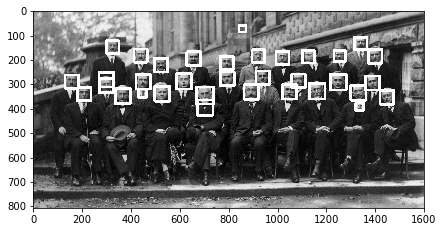

In [34]:
detect(solvay)

In [41]:
# here we can see that 2 rectangle are detecting the same face so we adjust some parameters in face_classifier.detectMultiScale
# to avoid such things

In [86]:
def adjusted_detect(img):
    face = img.copy()
    
#     rectangle cordinates
    face_rect = face_classifier.detectMultiScale(face, scaleFactor=1.2, minNeighbors=5)
#     print(face_rect)
    
    for (x, y, w, h) in face_rect:
        cv2.rectangle(face, (x, y), (x+w, y+h), 255, 10)   #255 means color
    
    imshow(face)

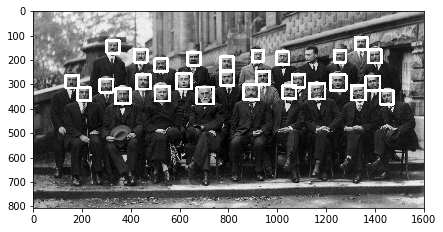

In [87]:
adjusted_detect(solvay)

In [82]:
# but here it did not detected the face who is not looking toward the camera, so we need to find the tradeoff between 
# scaleFactor and minNeighbors

In [99]:
img = cv2.imread('family_dataset/data(4).jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [ ]:
adjusted_detect(img)

# Track Face In Video

In [127]:
def detect(img):
    face = img.copy()
    
#     rectangle cordinates
    face_rect = face_classifier.detectMultiScale(face)
#     print(face_rect)
    
    for (x, y, w, h) in face_rect:
        cv2.rectangle(face, (x, y), (x+w, y+h), (0, 255, 0), 3)   #255 means color blue as channel is BGR
        cv2.putText(face, "Face Detected", (x, y-2), cv2.FONT_HERSHEY_COMPLEX,0.7, (0, 0, 255), 1)
    
#     imshow(face)   # if we do this instead of return then you will get error
    return face 

In [128]:
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read(0)
    frame = detect(frame)
    
#     if ret == True:
    cv2.imshow('VideoFaceDetect', frame)
    
    k = cv2.waitKey(1)
    if k == 27:
        break

cap.release()
cv2.destroyAllWindows()

In [121]:
cap.release()
cv2.destroyAllWindows()